# 导入所需的文件和块

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#导入源数据parse_dates解析为时间
df_raw = pd.read_csv("C:/Users/Administrator/Desktop/python/电商文本挖掘/资料\时间序列/train.csv", low_memory=False, parse_dates=['date'], index_col=['date'])

In [5]:
df_raw.head(1)
#5年某个店铺，所有物品的销量数据，预测接下来3年的销量

,store,item,sales
date,,,
2013-01-01,1,1,13


思路：如何根据过去每天的销量预测未来3年的销量呢？ 方法：（1）时间序列模型 时间序列模型包括：ARMA 和ARIMA模型，而应用时间序列模型要求是平稳序列。通过编制和分析时间序列，根据时间序列所反映出来的发展过程、方向和趋势，进行类推或延伸，借以预测下一段时间或以后若干年可能达到的水平。时间序列分析法是一种特殊的回归分析法，不考虑事物之间的相关关系 （2）线性回归模型 根据事务之间的因果关系来预测事务的发展和变化，通过对预测目标有直接或间接影响因素的分析找出其变化规律，并根据这种变化规律来确定预测值。 分类：一元线性回归(Yt ~ Xt)、多元线性回归(Yt ~ X1t, x2t, x3t)、自回归(Yt ~ Yt-1, Yt-2, Yt-3) 通过促销手段、促销幅度等预测销量

In [6]:
df_raw.info()
#无缺失值

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: int64(3)
memory usage: 27.9 MB


In [7]:
df_raw.store.value_counts()
#10个店铺

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64

In [8]:
df_raw.item.unique()
#50个品类，要对所有店铺的所有品类进行预测

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [9]:
df_raw.groupby(by='store').sum()
#可用回归的算法预测未来的销量

,item,sales
store,,
1,2328150,4315603
2,2328150,6120128
3,2328150,5435144
4,2328150,5012639
5,2328150,3631016
6,2328150,3627670
7,2328150,3320009
8,2328150,5856169
9,2328150,5025976


In [11]:
df_raw.sales=df_raw.sales*1.0

In [14]:
# 选取几个示例店铺的销售数据进行预测（你可以使用for循环，把所有店铺都添加进来）
sales_a = df_raw[df_raw.store == 2]['sales'].sort_index(ascending = True)
sales_b = df_raw[df_raw.store == 3]['sales'].sort_index(ascending = True) # 解决倒序
sales_c = df_raw[df_raw.store == 1]['sales'].sort_index(ascending = True)
sales_d = df_raw[df_raw.store == 4]['sales'].sort_index(ascending = True)

# 判断是否是平稳序列

## 判断某个店铺是平稳序列

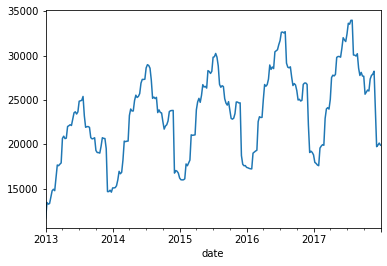

In [17]:
#时序图
#平稳序列的时序图在一个常数附近波动，而且波动范围有界
sales_a.resample('W').sum().plot()
#而此图有明显的趋势性，周期性，不是非平稳序列,有一定的规律性，方差不变就是平稳序列，非平稳序列看周期性和趋势性
#平稳序列

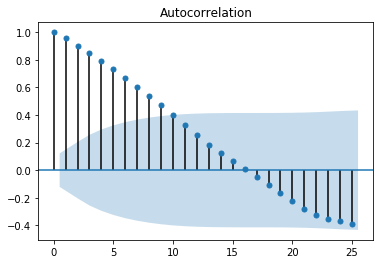

In [18]:
#自相关图
#平稳序列具有短期相关性，随着延迟期数的增加，平稳序列的自相关系数会比较快的衰减趋向于零，并在零附近随机波动。
#自相关图，
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales_a.resample('W').sum());#MS月

## 判断所有店铺是否是平稳序列

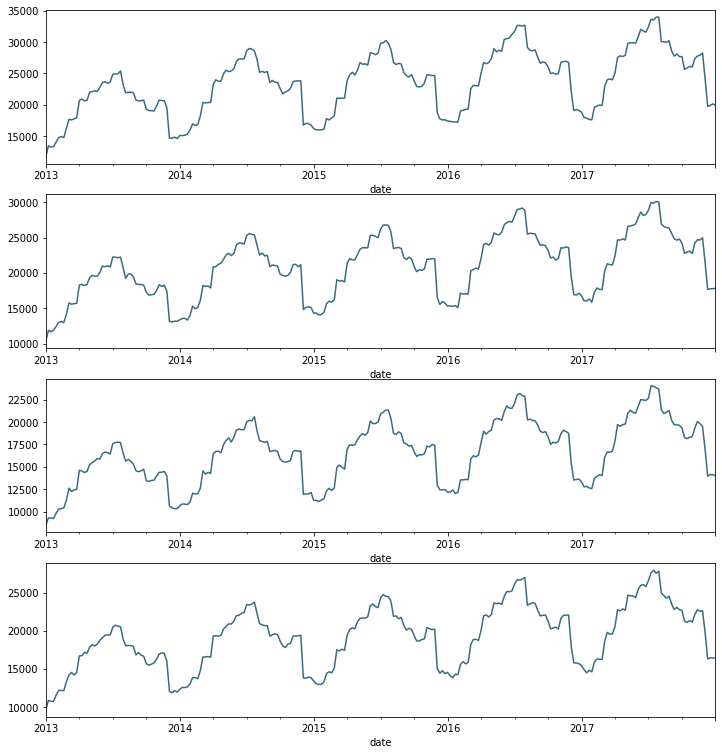

In [20]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))
c = '#386B7F'#线条的颜色编号
#按周"W"resample数据，对加总值绘制折线图
sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

这些店铺的销量并非是平稳序列，因此需调整成平稳形式

# 利用统计模型进行建模

In [21]:
import statsmodels.api as sm#利用统计模型进行线性回归

## 加法模型

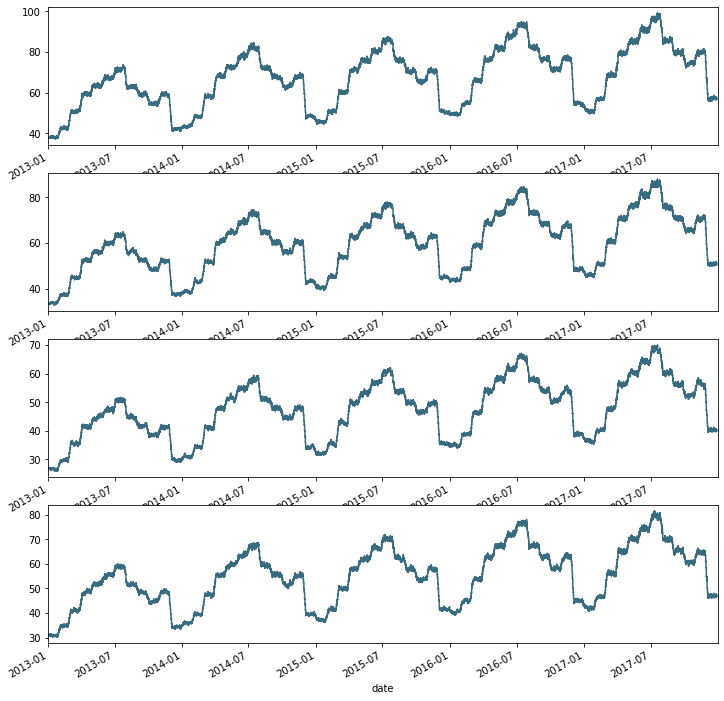

In [22]:
#按年加总绘制，所有店铺的可视化图形都是一样的
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

decomposition_a = sm.tsa.seasonal_decompose(sales_a, model = 'additive', freq = 365)
decomposition_a.trend.plot(color = c, ax = ax1)

decomposition_b = sm.tsa.seasonal_decompose(sales_b, model = 'additive', freq = 365)
decomposition_b.trend.plot(color = c, ax = ax2)

decomposition_c = sm.tsa.seasonal_decompose(sales_c, model = 'additive', freq = 365)
decomposition_c.trend.plot(color = c, ax = ax3)

decomposition_d = sm.tsa.seasonal_decompose(sales_d, model = 'additive', freq = 365)
decomposition_d.trend.plot(color = c, ax = ax4)
#可以从中发现非常明显的季节性
plt.show()

## 时序图

In [26]:
df_raw=df_raw.iloc[:,-1]

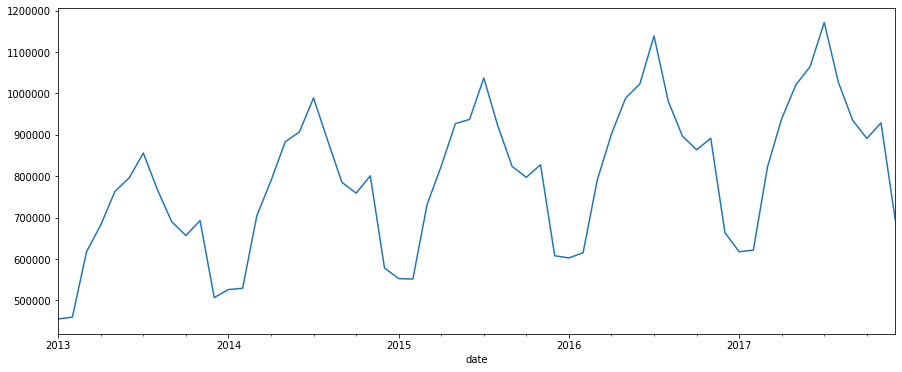

In [31]:
#时序图
#平稳序列的时序图在一个常数附近波动，而且波动范围有界
y=df_raw.resample('MS').sum()
y.plot(figsize=(15, 6))
plt.show()
#而此图有明显的趋势性，周期性，不是非平稳序列,有一定的规律性，方差不变就是平稳序列，非平稳序列看周期性和趋势性
#平稳序列

## 时间序列拆解

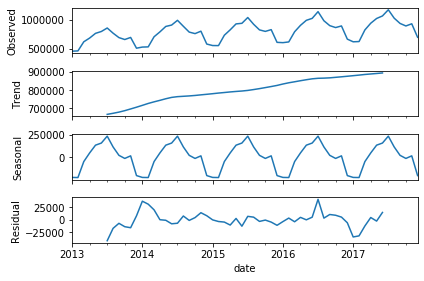

In [32]:
#为了进一步探究数据情况，我们可以对数据进行一个时间序列的分解
#分解为趋势、季节性和误差，这里使用statsmodels可以非常方便的完成这一点
#加法模型
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot();

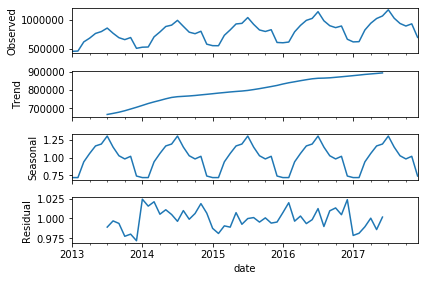

In [33]:
#为了进一步探究数据情况，我们可以对数据进行一个时间序列的分解
#分解为趋势、季节性和误差，这里使用statsmodels可以非常方便的完成这一点
#乘法模型
decomposition = sm.tsa.seasonal_decompose(y, model="multiplicative")
decomposition.plot();


乘法模型拆解后，季节性的值变小，误差也减小，因此用乘法模型拆解的效果较好

#3. 建立ARIMA/自回归移动平均模型模型
#使用常见的时间序列模型ARIMA(p,d,q)来进行预测
#ARIMA是指将非平稳时间序列转化为平稳时间序列
#然后将因变量仅对它的滞后值以及随机误差项的现值和滞后值进行回归所建立的模型

#其中p,d,q分别代表了数据中的季节性，趋势和噪音

##AR代指Auto-Regressive (p): 季节
#这里的p是指lags滞后的阶数，例如p=3, 那么我们会用x(t-1), x(t-2) 和x(t-3) 来预测 x(t)

##I代指Integrated (d): 趋势
#代表非季节性的差异，例如在这个案例中，我们使用了一阶差分，所以我们让d=0

##MA代指Moving Averages (q): 代表预测中滞后的预测误差 噪音

## 检验存在单位跟

In [34]:
import itertools #itertools是用于高效循环的迭代函数集合，p,d,q两两组合，导入，预测结果，
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))#对p,d,q的所有可能取值，进行配对组合
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


In [35]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print(seasonal_pdq)
#1年12个月的所有可能值

[(0, 0, 0, 12), (0, 0, 1, 12), (0, 0, 2, 12), (0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (0, 2, 0, 12), (0, 2, 1, 12), (0, 2, 2, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 0, 2, 12), (1, 1, 0, 12), (1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 0, 12), (1, 2, 1, 12), (1, 2, 2, 12), (2, 0, 0, 12), (2, 0, 1, 12), (2, 0, 2, 12), (2, 1, 0, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 0, 12), (2, 2, 1, 12), (2, 2, 2, 12)]


In [36]:
# 导入acf和pacf图的绘制工具，绘制多组子图subplot
#注意：其中各个参数也可以用逗号,分隔开。第一个参数代表子图的行数；第二个参数代表该行图像的列数； 第三个参数代表每行的第几个图像。
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

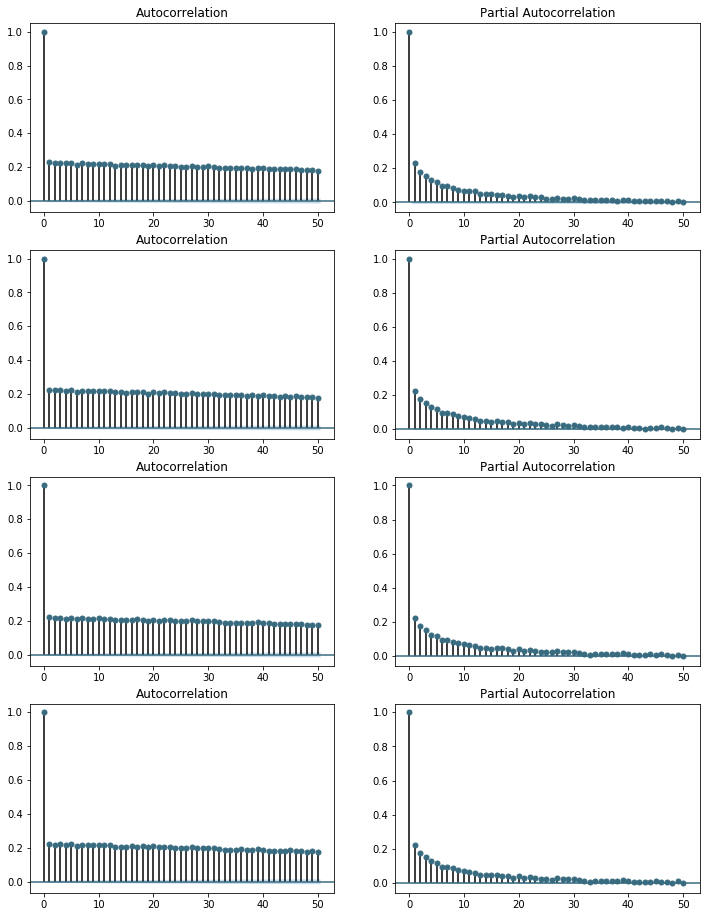

In [37]:
plt.figure(figsize = (12, 16))
# acf and pacf for A
plt.subplot(421);
plot_acf(sales_a, lags = 50, ax = plt.gca(), color = c);
plt.subplot(422);
plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = c);
# acf and pacf for B
plt.subplot(423);
plot_acf(sales_b, lags = 50, ax = plt.gca(), color = c);
plt.subplot(424);
plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = c);
# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = c);
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = c);

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = c);
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = c);
#这些图形展示了时间序列是有自相关性的

## 差分

In [38]:
#遍历
cnt = 0 #先初始化
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            cnt += 1
            if cnt % 50 :
                print('Current Iter - {}, ARIMA{}x{} 12 - AIC:{}'.format(cnt, param, param_seasonal, results.aic))
        except:
            continue

Current Iter - 1, ARIMA(0, 0, 0)x(0, 0, 0, 12) 12 - AIC:1775.9743967500065
Current Iter - 2, ARIMA(0, 0, 0)x(0, 0, 1, 12) 12 - AIC:1386.8929242855068
Current Iter - 3, ARIMA(0, 0, 0)x(0, 1, 0, 12) 12 - AIC:1179.6266962860743


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 4, ARIMA(0, 0, 0)x(0, 1, 1, 12) 12 - AIC:1416.6524736853737
Current Iter - 5, ARIMA(0, 0, 0)x(0, 2, 0, 12) 12 - AIC:862.979363415314
Current Iter - 6, ARIMA(0, 0, 0)x(1, 0, 0, 12) 12 - AIC:1141.2214771727804
Current Iter - 7, ARIMA(0, 0, 0)x(1, 0, 1, 12) 12 - AIC:1064.2900067414416
Current Iter - 8, ARIMA(0, 0, 0)x(1, 1, 0, 12) 12 - AIC:854.7922751569532


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 9, ARIMA(0, 0, 0)x(1, 1, 1, 12) 12 - AIC:1427.5778211385996


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 10, ARIMA(0, 0, 0)x(1, 2, 0, 12) 12 - AIC:536.7473637529097
Current Iter - 11, ARIMA(0, 0, 0)x(2, 0, 0, 12) 12 - AIC:799.4569382542611
Current Iter - 12, ARIMA(0, 0, 0)x(2, 0, 1, 12) 12 - AIC:775.0983971082961
Current Iter - 13, ARIMA(0, 0, 0)x(2, 1, 0, 12) 12 - AIC:517.9111218306845
Current Iter - 14, ARIMA(0, 0, 0)x(2, 1, 1, 12) 12 - AIC:513.1052170268729
Current Iter - 15, ARIMA(0, 0, 0)x(2, 2, 0, 12) 12 - AIC:261.4959483252958
Current Iter - 16, ARIMA(0, 0, 1)x(0, 0, 0, 12) 12 - AIC:1708.3259911943485
Current Iter - 17, ARIMA(0, 0, 1)x(0, 0, 1, 12) 12 - AIC:1348.6056995190304
Current Iter - 18, ARIMA(0, 0, 1)x(0, 1, 0, 12) 12 - AIC:1122.8435614347281
Current Iter - 19, ARIMA(0, 0, 1)x(0, 1, 1, 12) 12 - AIC:3031.6001680738964
Current Iter - 20, ARIMA(0, 0, 1)x(0, 2, 0, 12) 12 - AIC:813.4321273836288
Current Iter - 21, ARIMA(0, 0, 1)x(1, 0, 0, 12) 12 - AIC:1401.047179359693
Current Iter - 22, ARIMA(0, 0, 1)x(1, 0, 1, 12) 12 - AIC:1436.3287123098
Current Iter - 23, ARIM

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 34, ARIMA(0, 0, 2)x(0, 1, 1, 12) 12 - AIC:782.2894574017793
Current Iter - 35, ARIMA(0, 0, 2)x(0, 2, 0, 12) 12 - AIC:781.7979090140085
Current Iter - 36, ARIMA(0, 0, 2)x(1, 0, 0, 12) 12 - AIC:1401.774388348228
Current Iter - 37, ARIMA(0, 0, 2)x(1, 0, 1, 12) 12 - AIC:1316.604124904116
Current Iter - 38, ARIMA(0, 0, 2)x(1, 1, 0, 12) 12 - AIC:865.105576287759


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 39, ARIMA(0, 0, 2)x(1, 1, 1, 12) 12 - AIC:1259.8894162841211
Current Iter - 40, ARIMA(0, 0, 2)x(1, 2, 0, 12) 12 - AIC:561.4975354511898
Current Iter - 41, ARIMA(0, 0, 2)x(2, 0, 0, 12) 12 - AIC:1067.071134356122


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 42, ARIMA(0, 0, 2)x(2, 0, 1, 12) 12 - AIC:1089.162113068456
Current Iter - 43, ARIMA(0, 0, 2)x(2, 1, 0, 12) 12 - AIC:578.3807903894358
Current Iter - 44, ARIMA(0, 0, 2)x(2, 1, 1, 12) 12 - AIC:579.8675729953825
Current Iter - 45, ARIMA(0, 0, 2)x(2, 2, 0, 12) 12 - AIC:285.224685685075
Current Iter - 46, ARIMA(0, 1, 0)x(0, 0, 0, 12) 12 - AIC:1510.3936908291362
Current Iter - 47, ARIMA(0, 1, 0)x(0, 0, 1, 12) 12 - AIC:1176.2427303697075
Current Iter - 48, ARIMA(0, 1, 0)x(0, 1, 0, 12) 12 - AIC:1029.82305344997


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 49, ARIMA(0, 1, 0)x(0, 1, 1, 12) 12 - AIC:1395.148359193635
Current Iter - 51, ARIMA(0, 1, 0)x(1, 0, 0, 12) 12 - AIC:1046.9035784828386
Current Iter - 52, ARIMA(0, 1, 0)x(1, 0, 1, 12) 12 - AIC:1015.1085360834186
Current Iter - 53, ARIMA(0, 1, 0)x(1, 1, 0, 12) 12 - AIC:776.6169638221934


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 54, ARIMA(0, 1, 0)x(1, 1, 1, 12) 12 - AIC:1456.4358235771106
Current Iter - 55, ARIMA(0, 1, 0)x(1, 2, 0, 12) 12 - AIC:521.4405050388655
Current Iter - 56, ARIMA(0, 1, 0)x(2, 0, 0, 12) 12 - AIC:774.1134737322611
Current Iter - 57, ARIMA(0, 1, 0)x(2, 0, 1, 12) 12 - AIC:776.3384002348924
Current Iter - 58, ARIMA(0, 1, 0)x(2, 1, 0, 12) 12 - AIC:515.8873162273709


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 59, ARIMA(0, 1, 0)x(2, 1, 1, 12) 12 - AIC:881.116773592909
Current Iter - 60, ARIMA(0, 1, 0)x(2, 2, 0, 12) 12 - AIC:250.68739331137516
Current Iter - 61, ARIMA(0, 1, 1)x(0, 0, 0, 12) 12 - AIC:1483.1490870580733
Current Iter - 62, ARIMA(0, 1, 1)x(0, 0, 1, 12) 12 - AIC:1195.2054636583728
Current Iter - 63, ARIMA(0, 1, 1)x(0, 1, 0, 12) 12 - AIC:1009.3959760989883


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 64, ARIMA(0, 1, 1)x(0, 1, 1, 12) 12 - AIC:1338.2733510532137
Current Iter - 65, ARIMA(0, 1, 1)x(0, 2, 0, 12) 12 - AIC:765.1091002210493
Current Iter - 66, ARIMA(0, 1, 1)x(1, 0, 0, 12) 12 - AIC:1180.4604577690789
Current Iter - 67, ARIMA(0, 1, 1)x(1, 0, 1, 12) 12 - AIC:1132.1774807628087
Current Iter - 68, ARIMA(0, 1, 1)x(1, 1, 0, 12) 12 - AIC:779.0428375318529


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 69, ARIMA(0, 1, 1)x(1, 1, 1, 12) 12 - AIC:1230.7515800036533
Current Iter - 70, ARIMA(0, 1, 1)x(1, 2, 0, 12) 12 - AIC:527.0655052180614
Current Iter - 71, ARIMA(0, 1, 1)x(2, 0, 0, 12) 12 - AIC:882.3905740340899
Current Iter - 72, ARIMA(0, 1, 1)x(2, 0, 1, 12) 12 - AIC:884.3876213990455
Current Iter - 73, ARIMA(0, 1, 1)x(2, 1, 0, 12) 12 - AIC:517.7497287738923


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 74, ARIMA(0, 1, 1)x(2, 1, 1, 12) 12 - AIC:912.3294825534731
Current Iter - 75, ARIMA(0, 1, 1)x(2, 2, 0, 12) 12 - AIC:253.58044082671063
Current Iter - 76, ARIMA(0, 1, 2)x(0, 0, 0, 12) 12 - AIC:1458.052055292525
Current Iter - 77, ARIMA(0, 1, 2)x(0, 0, 1, 12) 12 - AIC:1165.6659632811984
Current Iter - 78, ARIMA(0, 1, 2)x(0, 1, 0, 12) 12 - AIC:985.7924346465504


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 79, ARIMA(0, 1, 2)x(0, 1, 1, 12) 12 - AIC:1344.8954606251873
Current Iter - 80, ARIMA(0, 1, 2)x(0, 2, 0, 12) 12 - AIC:743.1511302814724
Current Iter - 81, ARIMA(0, 1, 2)x(1, 0, 0, 12) 12 - AIC:1180.2718293029993
Current Iter - 82, ARIMA(0, 1, 2)x(1, 0, 1, 12) 12 - AIC:1107.154763530447
Current Iter - 83, ARIMA(0, 1, 2)x(1, 1, 0, 12) 12 - AIC:780.5073325953957


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 84, ARIMA(0, 1, 2)x(1, 1, 1, 12) 12 - AIC:1263.0836674018149
Current Iter - 85, ARIMA(0, 1, 2)x(1, 2, 0, 12) 12 - AIC:529.0869743946315
Current Iter - 86, ARIMA(0, 1, 2)x(2, 0, 0, 12) 12 - AIC:882.7465739452023
Current Iter - 87, ARIMA(0, 1, 2)x(2, 0, 1, 12) 12 - AIC:884.7452481302163
Current Iter - 88, ARIMA(0, 1, 2)x(2, 1, 0, 12) 12 - AIC:519.4812239132513


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 89, ARIMA(0, 1, 2)x(2, 1, 1, 12) 12 - AIC:978.169516818434
Current Iter - 90, ARIMA(0, 1, 2)x(2, 2, 0, 12) 12 - AIC:254.714132485501
Current Iter - 91, ARIMA(0, 2, 0)x(0, 0, 0, 12) 12 - AIC:1507.4378072931515
Current Iter - 92, ARIMA(0, 2, 0)x(0, 0, 1, 12) 12 - AIC:1166.0095784973698
Current Iter - 93, ARIMA(0, 2, 0)x(0, 1, 0, 12) 12 - AIC:1040.0151818190934


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 94, ARIMA(0, 2, 0)x(0, 1, 1, 12) 12 - AIC:1287.3840062785077
Current Iter - 95, ARIMA(0, 2, 0)x(0, 2, 0, 12) 12 - AIC:786.5456482925123
Current Iter - 96, ARIMA(0, 2, 0)x(1, 0, 0, 12) 12 - AIC:1061.5752776350791
Current Iter - 97, ARIMA(0, 2, 0)x(1, 0, 1, 12) 12 - AIC:1037.2093337084023
Current Iter - 98, ARIMA(0, 2, 0)x(1, 1, 0, 12) 12 - AIC:785.833705872878


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 99, ARIMA(0, 2, 0)x(1, 1, 1, 12) 12 - AIC:1096.5236679781622


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 101, ARIMA(0, 2, 0)x(2, 0, 0, 12) 12 - AIC:787.5910545118182
Current Iter - 102, ARIMA(0, 2, 0)x(2, 0, 1, 12) 12 - AIC:790.4280772207705
Current Iter - 103, ARIMA(0, 2, 0)x(2, 1, 0, 12) 12 - AIC:516.7882568308448


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 104, ARIMA(0, 2, 0)x(2, 1, 1, 12) 12 - AIC:684.4558489579612
Current Iter - 105, ARIMA(0, 2, 0)x(2, 2, 0, 12) 12 - AIC:240.60079847299082
Current Iter - 106, ARIMA(0, 2, 1)x(0, 0, 0, 12) 12 - AIC:1469.3075182093128
Current Iter - 107, ARIMA(0, 2, 1)x(0, 0, 1, 12) 12 - AIC:1180.2748482210216
Current Iter - 108, ARIMA(0, 2, 1)x(0, 1, 0, 12) 12 - AIC:1003.0427550740902


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 109, ARIMA(0, 2, 1)x(0, 1, 1, 12) 12 - AIC:1296.724982252594
Current Iter - 110, ARIMA(0, 2, 1)x(0, 2, 0, 12) 12 - AIC:753.5420115646217
Current Iter - 111, ARIMA(0, 2, 1)x(1, 0, 0, 12) 12 - AIC:1168.4105133878002
Current Iter - 112, ARIMA(0, 2, 1)x(1, 0, 1, 12) 12 - AIC:1119.2471352048713
Current Iter - 113, ARIMA(0, 2, 1)x(1, 1, 0, 12) 12 - AIC:766.8408489182852


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 114, ARIMA(0, 2, 1)x(1, 1, 1, 12) 12 - AIC:1094.5280612812326
Current Iter - 115, ARIMA(0, 2, 1)x(1, 2, 0, 12) 12 - AIC:518.9739941940516
Current Iter - 116, ARIMA(0, 2, 1)x(2, 0, 0, 12) 12 - AIC:866.5359365104283
Current Iter - 117, ARIMA(0, 2, 1)x(2, 0, 1, 12) 12 - AIC:868.3829145261573
Current Iter - 118, ARIMA(0, 2, 1)x(2, 1, 0, 12) 12 - AIC:499.4493551815442


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 119, ARIMA(0, 2, 1)x(2, 1, 1, 12) 12 - AIC:695.9518762020764
Current Iter - 120, ARIMA(0, 2, 1)x(2, 2, 0, 12) 12 - AIC:237.05005436011848
Current Iter - 121, ARIMA(0, 2, 2)x(0, 0, 0, 12) 12 - AIC:1447.8115067173424
Current Iter - 122, ARIMA(0, 2, 2)x(0, 0, 1, 12) 12 - AIC:1116.53137133146
Current Iter - 123, ARIMA(0, 2, 2)x(0, 1, 0, 12) 12 - AIC:969.9000213291889


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 124, ARIMA(0, 2, 2)x(0, 1, 1, 12) 12 - AIC:1157.6438312218713
Current Iter - 125, ARIMA(0, 2, 2)x(0, 2, 0, 12) 12 - AIC:731.3797185131258
Current Iter - 126, ARIMA(0, 2, 2)x(1, 0, 0, 12) 12 - AIC:1180.671745712737
Current Iter - 127, ARIMA(0, 2, 2)x(1, 0, 1, 12) 12 - AIC:1105.440389072391
Current Iter - 128, ARIMA(0, 2, 2)x(1, 1, 0, 12) 12 - AIC:763.0782946700368


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 129, ARIMA(0, 2, 2)x(1, 1, 1, 12) 12 - AIC:1116.4758979439614
Current Iter - 130, ARIMA(0, 2, 2)x(1, 2, 0, 12) 12 - AIC:521.8830170835868
Current Iter - 131, ARIMA(0, 2, 2)x(2, 0, 0, 12) 12 - AIC:876.0627350256817
Current Iter - 132, ARIMA(0, 2, 2)x(2, 0, 1, 12) 12 - AIC:878.063428141494
Current Iter - 133, ARIMA(0, 2, 2)x(2, 1, 0, 12) 12 - AIC:497.90830926510426


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 134, ARIMA(0, 2, 2)x(2, 1, 1, 12) 12 - AIC:792.8260307750314


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 135, ARIMA(0, 2, 2)x(2, 2, 0, 12) 12 - AIC:237.33519840519418
Current Iter - 136, ARIMA(1, 0, 0)x(0, 0, 0, 12) 12 - AIC:1537.272756448575
Current Iter - 137, ARIMA(1, 0, 0)x(0, 0, 1, 12) 12 - AIC:1197.9128342810939
Current Iter - 138, ARIMA(1, 0, 0)x(0, 1, 0, 12) 12 - AIC:1051.775873231793


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 139, ARIMA(1, 0, 0)x(0, 1, 1, 12) 12 - AIC:1442.4855395294605
Current Iter - 140, ARIMA(1, 0, 0)x(0, 2, 0, 12) 12 - AIC:807.0910959790135
Current Iter - 141, ARIMA(1, 0, 0)x(1, 0, 0, 12) 12 - AIC:1181.4030269627658
Current Iter - 142, ARIMA(1, 0, 0)x(1, 0, 1, 12) 12 - AIC:1183.084707693475
Current Iter - 143, ARIMA(1, 0, 0)x(1, 1, 0, 12) 12 - AIC:778.8719018887543


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 144, ARIMA(1, 0, 0)x(1, 1, 1, 12) 12 - AIC:1383.4067509100498
Current Iter - 145, ARIMA(1, 0, 0)x(1, 2, 0, 12) 12 - AIC:520.6935747417429
Current Iter - 146, ARIMA(1, 0, 0)x(2, 0, 0, 12) 12 - AIC:883.0578779568234
Current Iter - 147, ARIMA(1, 0, 0)x(2, 0, 1, 12) 12 - AIC:884.8039485357667
Current Iter - 148, ARIMA(1, 0, 0)x(2, 1, 0, 12) 12 - AIC:505.7336115166938
Current Iter - 149, ARIMA(1, 0, 0)x(2, 1, 1, 12) 12 - AIC:506.20832650554024
Current Iter - 151, ARIMA(1, 0, 1)x(0, 0, 0, 12) 12 - AIC:1512.1625682905928
Current Iter - 152, ARIMA(1, 0, 1)x(0, 0, 1, 12) 12 - AIC:1173.455607324601
Current Iter - 153, ARIMA(1, 0, 1)x(0, 1, 0, 12) 12 - AIC:1032.0202139383873


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 154, ARIMA(1, 0, 1)x(0, 1, 1, 12) 12 - AIC:1445.4355793965804
Current Iter - 155, ARIMA(1, 0, 1)x(0, 2, 0, 12) 12 - AIC:786.3237671553705
Current Iter - 156, ARIMA(1, 0, 1)x(1, 0, 0, 12) 12 - AIC:1182.1518190713507
Current Iter - 157, ARIMA(1, 0, 1)x(1, 0, 1, 12) 12 - AIC:1158.8557053063312
Current Iter - 158, ARIMA(1, 0, 1)x(1, 1, 0, 12) 12 - AIC:780.1194060362191


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 159, ARIMA(1, 0, 1)x(1, 1, 1, 12) 12 - AIC:1432.012300837245
Current Iter - 160, ARIMA(1, 0, 1)x(1, 2, 0, 12) 12 - AIC:523.1376229174716
Current Iter - 161, ARIMA(1, 0, 1)x(2, 0, 0, 12) 12 - AIC:884.1133043460555
Current Iter - 162, ARIMA(1, 0, 1)x(2, 0, 1, 12) 12 - AIC:885.9388370709811
Current Iter - 163, ARIMA(1, 0, 1)x(2, 1, 0, 12) 12 - AIC:506.10960645142103


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 164, ARIMA(1, 0, 1)x(2, 1, 1, 12) 12 - AIC:505.68671592046786
Current Iter - 165, ARIMA(1, 0, 1)x(2, 2, 0, 12) 12 - AIC:253.58974884706157
Current Iter - 166, ARIMA(1, 0, 2)x(0, 0, 0, 12) 12 - AIC:1484.6027603954697
Current Iter - 167, ARIMA(1, 0, 2)x(0, 0, 1, 12) 12 - AIC:84775.8712203659
Current Iter - 168, ARIMA(1, 0, 2)x(0, 1, 0, 12) 12 - AIC:1005.7755154751137


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 169, ARIMA(1, 0, 2)x(0, 1, 1, 12) 12 - AIC:1300.538184777949
Current Iter - 170, ARIMA(1, 0, 2)x(0, 2, 0, 12) 12 - AIC:764.732234598925
Current Iter - 171, ARIMA(1, 0, 2)x(1, 0, 0, 12) 12 - AIC:1184.5911704122068
Current Iter - 172, ARIMA(1, 0, 2)x(1, 0, 1, 12) 12 - AIC:1136.3077640575216
Current Iter - 173, ARIMA(1, 0, 2)x(1, 1, 0, 12) 12 - AIC:781.4581298042756


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 174, ARIMA(1, 0, 2)x(1, 1, 1, 12) 12 - AIC:1245.5096382319334
Current Iter - 175, ARIMA(1, 0, 2)x(1, 2, 0, 12) 12 - AIC:519.1095890819656
Current Iter - 176, ARIMA(1, 0, 2)x(2, 0, 0, 12) 12 - AIC:886.4554803777311
Current Iter - 177, ARIMA(1, 0, 2)x(2, 0, 1, 12) 12 - AIC:888.2673196267698
Current Iter - 178, ARIMA(1, 0, 2)x(2, 1, 0, 12) 12 - AIC:506.87477723249015


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 179, ARIMA(1, 0, 2)x(2, 1, 1, 12) 12 - AIC:506.13857310581244
Current Iter - 180, ARIMA(1, 0, 2)x(2, 2, 0, 12) 12 - AIC:254.3756428401094
Current Iter - 181, ARIMA(1, 1, 0)x(0, 0, 0, 12) 12 - AIC:1509.6389019320704
Current Iter - 182, ARIMA(1, 1, 0)x(0, 0, 1, 12) 12 - AIC:1171.459876704498
Current Iter - 183, ARIMA(1, 1, 0)x(0, 1, 0, 12) 12 - AIC:1031.7443576236876


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 184, ARIMA(1, 1, 0)x(0, 1, 1, 12) 12 - AIC:1338.1929461776679
Current Iter - 185, ARIMA(1, 1, 0)x(0, 2, 0, 12) 12 - AIC:787.3843451024155
Current Iter - 186, ARIMA(1, 1, 0)x(1, 0, 0, 12) 12 - AIC:1155.196759928882
Current Iter - 187, ARIMA(1, 1, 0)x(1, 0, 1, 12) 12 - AIC:1156.8895534770645
Current Iter - 188, ARIMA(1, 1, 0)x(1, 1, 0, 12) 12 - AIC:756.8053685821753


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 189, ARIMA(1, 1, 0)x(1, 1, 1, 12) 12 - AIC:1407.9168783096081
Current Iter - 190, ARIMA(1, 1, 0)x(1, 2, 0, 12) 12 - AIC:499.1105894229016
Current Iter - 191, ARIMA(1, 1, 0)x(2, 0, 0, 12) 12 - AIC:857.046408749014
Current Iter - 192, ARIMA(1, 1, 0)x(2, 0, 1, 12) 12 - AIC:859.0426415576786
Current Iter - 193, ARIMA(1, 1, 0)x(2, 1, 0, 12) 12 - AIC:490.0779735102732


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 194, ARIMA(1, 1, 0)x(2, 1, 1, 12) 12 - AIC:930.620875014191
Current Iter - 195, ARIMA(1, 1, 0)x(2, 2, 0, 12) 12 - AIC:231.11798154107308
Current Iter - 196, ARIMA(1, 1, 1)x(0, 0, 0, 12) 12 - AIC:1484.176430722232
Current Iter - 197, ARIMA(1, 1, 1)x(0, 0, 1, 12) 12 - AIC:1148.423780980394
Current Iter - 198, ARIMA(1, 1, 1)x(0, 1, 0, 12) 12 - AIC:1006.2723727759328


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 199, ARIMA(1, 1, 1)x(0, 1, 1, 12) 12 - AIC:1281.537207891109
Current Iter - 201, ARIMA(1, 1, 1)x(1, 0, 0, 12) 12 - AIC:1157.3935139949037
Current Iter - 202, ARIMA(1, 1, 1)x(1, 0, 1, 12) 12 - AIC:1134.1121454406052
Current Iter - 203, ARIMA(1, 1, 1)x(1, 1, 0, 12) 12 - AIC:757.8185686354548


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 204, ARIMA(1, 1, 1)x(1, 1, 1, 12) 12 - AIC:1107.2586746709715
Current Iter - 205, ARIMA(1, 1, 1)x(1, 2, 0, 12) 12 - AIC:505.9889664358336
Current Iter - 206, ARIMA(1, 1, 1)x(2, 0, 0, 12) 12 - AIC:859.204433777419
Current Iter - 207, ARIMA(1, 1, 1)x(2, 0, 1, 12) 12 - AIC:861.2025930672518
Current Iter - 208, ARIMA(1, 1, 1)x(2, 1, 0, 12) 12 - AIC:491.1786576230569
Current Iter - 209, ARIMA(1, 1, 1)x(2, 1, 1, 12) 12 - AIC:938.9905073419035
Current Iter - 210, ARIMA(1, 1, 1)x(2, 2, 0, 12) 12 - AIC:231.99421199708834
Current Iter - 211, ARIMA(1, 1, 2)x(0, 0, 0, 12) 12 - AIC:1467.322445355108


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 212, ARIMA(1, 1, 2)x(0, 0, 1, 12) 12 - AIC:1118.696524132095
Current Iter - 213, ARIMA(1, 1, 2)x(0, 1, 0, 12) 12 - AIC:980.6030150934774
Current Iter - 214, ARIMA(1, 1, 2)x(0, 1, 1, 12) 12 - AIC:2750.185997901439
Current Iter - 215, ARIMA(1, 1, 2)x(0, 2, 0, 12) 12 - AIC:743.5142895471621


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 216, ARIMA(1, 1, 2)x(1, 0, 0, 12) 12 - AIC:1142.8623729391497


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 217, ARIMA(1, 1, 2)x(1, 0, 1, 12) 12 - AIC:1095.4014342652122
Current Iter - 218, ARIMA(1, 1, 2)x(1, 1, 0, 12) 12 - AIC:754.7133317280754
Current Iter - 219, ARIMA(1, 1, 2)x(1, 1, 1, 12) 12 - AIC:2940.96173437834
Current Iter - 220, ARIMA(1, 1, 2)x(1, 2, 0, 12) 12 - AIC:502.577003232376
Current Iter - 221, ARIMA(1, 1, 2)x(2, 0, 0, 12) 12 - AIC:849.0112155092941


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 222, ARIMA(1, 1, 2)x(2, 0, 1, 12) 12 - AIC:851.01277997946
Current Iter - 223, ARIMA(1, 1, 2)x(2, 1, 0, 12) 12 - AIC:494.02988665720153


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 224, ARIMA(1, 1, 2)x(2, 1, 1, 12) 12 - AIC:1904.6945357334994
Current Iter - 225, ARIMA(1, 1, 2)x(2, 2, 0, 12) 12 - AIC:232.9126800382756
Current Iter - 226, ARIMA(1, 2, 0)x(0, 0, 0, 12) 12 - AIC:1496.5303226693673
Current Iter - 227, ARIMA(1, 2, 0)x(0, 0, 1, 12) 12 - AIC:1157.0294309521144
Current Iter - 228, ARIMA(1, 2, 0)x(0, 1, 0, 12) 12 - AIC:1031.3602865126254


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 229, ARIMA(1, 2, 0)x(0, 1, 1, 12) 12 - AIC:1248.1151906939067
Current Iter - 230, ARIMA(1, 2, 0)x(0, 2, 0, 12) 12 - AIC:781.9750232813599
Current Iter - 231, ARIMA(1, 2, 0)x(1, 0, 0, 12) 12 - AIC:1140.7386316645395
Current Iter - 232, ARIMA(1, 2, 0)x(1, 0, 1, 12) 12 - AIC:1142.5035786318308
Current Iter - 233, ARIMA(1, 2, 0)x(1, 1, 0, 12) 12 - AIC:754.113822456043


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 234, ARIMA(1, 2, 0)x(1, 1, 1, 12) 12 - AIC:1236.0499351206215
Current Iter - 235, ARIMA(1, 2, 0)x(1, 2, 0, 12) 12 - AIC:493.1096175569511
Current Iter - 236, ARIMA(1, 2, 0)x(2, 0, 0, 12) 12 - AIC:839.9553881099848
Current Iter - 237, ARIMA(1, 2, 0)x(2, 0, 1, 12) 12 - AIC:841.95283008197
Current Iter - 238, ARIMA(1, 2, 0)x(2, 1, 0, 12) 12 - AIC:486.24235397020817


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 239, ARIMA(1, 2, 0)x(2, 1, 1, 12) 12 - AIC:663.7113003659498
Current Iter - 240, ARIMA(1, 2, 0)x(2, 2, 0, 12) 12 - AIC:215.189601140191
Current Iter - 241, ARIMA(1, 2, 1)x(0, 0, 0, 12) 12 - AIC:1471.2314064465086


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 242, ARIMA(1, 2, 1)x(0, 0, 1, 12) 12 - AIC:1129.5375101786292
Current Iter - 243, ARIMA(1, 2, 1)x(0, 1, 0, 12) 12 - AIC:1004.2494016075702


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 244, ARIMA(1, 2, 1)x(0, 1, 1, 12) 12 - AIC:1242.2881007063224
Current Iter - 245, ARIMA(1, 2, 1)x(0, 2, 0, 12) 12 - AIC:755.3743577524388
Current Iter - 246, ARIMA(1, 2, 1)x(1, 0, 0, 12) 12 - AIC:1144.1953618848222
Current Iter - 247, ARIMA(1, 2, 1)x(1, 0, 1, 12) 12 - AIC:1120.610422341602
Current Iter - 248, ARIMA(1, 2, 1)x(1, 1, 0, 12) 12 - AIC:746.0898717882952


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 249, ARIMA(1, 2, 1)x(1, 1, 1, 12) 12 - AIC:1241.0445405102378
Current Iter - 251, ARIMA(1, 2, 1)x(2, 0, 0, 12) 12 - AIC:842.8300099040464
Current Iter - 252, ARIMA(1, 2, 1)x(2, 0, 1, 12) 12 - AIC:844.7926400139393
Current Iter - 253, ARIMA(1, 2, 1)x(2, 1, 0, 12) 12 - AIC:475.44360928281264
Current Iter - 254, ARIMA(1, 2, 1)x(2, 1, 1, 12) 12 - AIC:703.2112675359623
Current Iter - 255, ARIMA(1, 2, 1)x(2, 2, 0, 12) 12 - AIC:214.23111616123367
Current Iter - 256, ARIMA(1, 2, 2)x(0, 0, 0, 12) 12 - AIC:1430.7467373336715
Current Iter - 257, ARIMA(1, 2, 2)x(0, 0, 1, 12) 12 - AIC:1141.3510167817085
Current Iter - 258, ARIMA(1, 2, 2)x(0, 1, 0, 12) 12 - AIC:968.7564539376676
Current Iter - 259, ARIMA(1, 2, 2)x(0, 1, 1, 12) 12 - AIC:1795.3963195211413
Current Iter - 260, ARIMA(1, 2, 2)x(0, 2, 0, 12) 12 - AIC:728.951836135421
Current Iter - 261, ARIMA(1, 2, 2)x(1, 0, 0, 12) 12 - AIC:1139.171438198639


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 262, ARIMA(1, 2, 2)x(1, 0, 1, 12) 12 - AIC:1090.5276507391327
Current Iter - 263, ARIMA(1, 2, 2)x(1, 1, 0, 12) 12 - AIC:745.1461545918471


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 264, ARIMA(1, 2, 2)x(1, 1, 1, 12) 12 - AIC:1178.3281869786013
Current Iter - 265, ARIMA(1, 2, 2)x(1, 2, 0, 12) 12 - AIC:498.0249475269431


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 266, ARIMA(1, 2, 2)x(2, 0, 0, 12) 12 - AIC:839.5030053814003


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 267, ARIMA(1, 2, 2)x(2, 0, 1, 12) 12 - AIC:841.5929018643797
Current Iter - 268, ARIMA(1, 2, 2)x(2, 1, 0, 12) 12 - AIC:479.1823006178623
Current Iter - 269, ARIMA(1, 2, 2)x(2, 1, 1, 12) 12 - AIC:530.1773233432939


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 270, ARIMA(1, 2, 2)x(2, 2, 0, 12) 12 - AIC:215.49073888134734
Current Iter - 271, ARIMA(2, 0, 0)x(0, 0, 0, 12) 12 - AIC:1511.363987742776
Current Iter - 272, ARIMA(2, 0, 0)x(0, 0, 1, 12) 12 - AIC:1198.6491238151739
Current Iter - 273, ARIMA(2, 0, 0)x(0, 1, 0, 12) 12 - AIC:1032.4348943753612


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 274, ARIMA(2, 0, 0)x(0, 1, 1, 12) 12 - AIC:1416.3750915862154
Current Iter - 275, ARIMA(2, 0, 0)x(0, 2, 0, 12) 12 - AIC:786.8005927802071
Current Iter - 276, ARIMA(2, 0, 0)x(1, 0, 0, 12) 12 - AIC:1156.919038499413
Current Iter - 277, ARIMA(2, 0, 0)x(1, 0, 1, 12) 12 - AIC:1158.5712604769
Current Iter - 278, ARIMA(2, 0, 0)x(1, 1, 0, 12) 12 - AIC:758.3404775978


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 279, ARIMA(2, 0, 0)x(1, 1, 1, 12) 12 - AIC:1375.5849368781132
Current Iter - 280, ARIMA(2, 0, 0)x(1, 2, 0, 12) 12 - AIC:499.15432860286137
Current Iter - 281, ARIMA(2, 0, 0)x(2, 0, 0, 12) 12 - AIC:858.8543512402256
Current Iter - 282, ARIMA(2, 0, 0)x(2, 0, 1, 12) 12 - AIC:860.6181186698151
Current Iter - 283, ARIMA(2, 0, 0)x(2, 1, 0, 12) 12 - AIC:484.9480757628388


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 284, ARIMA(2, 0, 0)x(2, 1, 1, 12) 12 - AIC:485.0452090932449


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 285, ARIMA(2, 0, 0)x(2, 2, 0, 12) 12 - AIC:230.2651519924036
Current Iter - 286, ARIMA(2, 0, 1)x(0, 0, 0, 12) 12 - AIC:1511.0359321267451


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 287, ARIMA(2, 0, 1)x(0, 0, 1, 12) 12 - AIC:1178.4087401387478
Current Iter - 288, ARIMA(2, 0, 1)x(0, 1, 0, 12) 12 - AIC:1053.856506076875


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 289, ARIMA(2, 0, 1)x(0, 1, 1, 12) 12 - AIC:nan
Current Iter - 290, ARIMA(2, 0, 1)x(0, 2, 0, 12) 12 - AIC:789.8350200579675
Current Iter - 291, ARIMA(2, 0, 1)x(1, 0, 0, 12) 12 - AIC:1157.567577866255
Current Iter - 292, ARIMA(2, 0, 1)x(1, 0, 1, 12) 12 - AIC:1159.4549136268834
Current Iter - 293, ARIMA(2, 0, 1)x(1, 1, 0, 12) 12 - AIC:759.0648792867586


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 294, ARIMA(2, 0, 1)x(1, 1, 1, 12) 12 - AIC:3005.926511105842
Current Iter - 295, ARIMA(2, 0, 1)x(1, 2, 0, 12) 12 - AIC:501.62869973974665
Current Iter - 296, ARIMA(2, 0, 1)x(2, 0, 0, 12) 12 - AIC:860.0801950721029
Current Iter - 297, ARIMA(2, 0, 1)x(2, 0, 1, 12) 12 - AIC:862.1119172170975
Current Iter - 298, ARIMA(2, 0, 1)x(2, 1, 0, 12) 12 - AIC:485.3552896394195


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 299, ARIMA(2, 0, 1)x(2, 1, 1, 12) 12 - AIC:489.78475002237155
Current Iter - 301, ARIMA(2, 0, 2)x(0, 0, 0, 12) 12 - AIC:1482.4945686523758


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 302, ARIMA(2, 0, 2)x(0, 0, 1, 12) 12 - AIC:68583.54658040241
Current Iter - 303, ARIMA(2, 0, 2)x(0, 1, 0, 12) 12 - AIC:1007.7030722185838


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 304, ARIMA(2, 0, 2)x(0, 1, 1, 12) 12 - AIC:1424.7952896246015
Current Iter - 305, ARIMA(2, 0, 2)x(0, 2, 0, 12) 12 - AIC:766.5146289186758
Current Iter - 306, ARIMA(2, 0, 2)x(1, 0, 0, 12) 12 - AIC:1161.0237081594757
Current Iter - 307, ARIMA(2, 0, 2)x(1, 0, 1, 12) 12 - AIC:1137.6909062165455
Current Iter - 308, ARIMA(2, 0, 2)x(1, 1, 0, 12) 12 - AIC:757.8912062386808


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 309, ARIMA(2, 0, 2)x(1, 1, 1, 12) 12 - AIC:nan
Current Iter - 310, ARIMA(2, 0, 2)x(1, 2, 0, 12) 12 - AIC:502.9101670339234
Current Iter - 311, ARIMA(2, 0, 2)x(2, 0, 0, 12) 12 - AIC:862.9473890639009
Current Iter - 312, ARIMA(2, 0, 2)x(2, 0, 1, 12) 12 - AIC:864.7510692727833
Current Iter - 313, ARIMA(2, 0, 2)x(2, 1, 0, 12) 12 - AIC:484.79946518089764


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 314, ARIMA(2, 0, 2)x(2, 1, 1, 12) 12 - AIC:485.60663633584227
Current Iter - 315, ARIMA(2, 0, 2)x(2, 2, 0, 12) 12 - AIC:234.30973807086238
Current Iter - 316, ARIMA(2, 1, 0)x(0, 0, 0, 12) 12 - AIC:1483.6889295283409
Current Iter - 317, ARIMA(2, 1, 0)x(0, 0, 1, 12) 12 - AIC:1171.9408065643374
Current Iter - 318, ARIMA(2, 1, 0)x(0, 1, 0, 12) 12 - AIC:1010.5806641312302
Current Iter - 319, ARIMA(2, 1, 0)x(0, 1, 1, 12) 12 - AIC:1430.4516304521085
Current Iter - 320, ARIMA(2, 1, 0)x(0, 2, 0, 12) 12 - AIC:765.8020004971019
Current Iter - 321, ARIMA(2, 1, 0)x(1, 0, 0, 12) 12 - AIC:1130.6824266733238
Current Iter - 322, ARIMA(2, 1, 0)x(1, 0, 1, 12) 12 - AIC:1132.3211427650624
Current Iter - 323, ARIMA(2, 1, 0)x(1, 1, 0, 12) 12 - AIC:736.6297691283633


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 324, ARIMA(2, 1, 0)x(1, 1, 1, 12) 12 - AIC:1368.5680405712903
Current Iter - 325, ARIMA(2, 1, 0)x(1, 2, 0, 12) 12 - AIC:475.0790562459831
Current Iter - 326, ARIMA(2, 1, 0)x(2, 0, 0, 12) 12 - AIC:832.7899660591104
Current Iter - 327, ARIMA(2, 1, 0)x(2, 0, 1, 12) 12 - AIC:834.6978969678587
Current Iter - 328, ARIMA(2, 1, 0)x(2, 1, 0, 12) 12 - AIC:464.9497396963619


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 329, ARIMA(2, 1, 0)x(2, 1, 1, 12) 12 - AIC:893.8669398308979
Current Iter - 330, ARIMA(2, 1, 0)x(2, 2, 0, 12) 12 - AIC:209.21972652128974
Current Iter - 331, ARIMA(2, 1, 1)x(0, 0, 0, 12) 12 - AIC:1478.4172218372682
Current Iter - 332, ARIMA(2, 1, 1)x(0, 0, 1, 12) 12 - AIC:1146.5736631147151
Current Iter - 333, ARIMA(2, 1, 1)x(0, 1, 0, 12) 12 - AIC:1007.1952809235496
Current Iter - 334, ARIMA(2, 1, 1)x(0, 1, 1, 12) 12 - AIC:1308.9875670817264
Current Iter - 335, ARIMA(2, 1, 1)x(0, 2, 0, 12) 12 - AIC:764.1620183180984
Current Iter - 336, ARIMA(2, 1, 1)x(1, 0, 0, 12) 12 - AIC:1131.803905332861


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 337, ARIMA(2, 1, 1)x(1, 0, 1, 12) 12 - AIC:1133.442821792111
Current Iter - 338, ARIMA(2, 1, 1)x(1, 1, 0, 12) 12 - AIC:733.1951704520153


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 339, ARIMA(2, 1, 1)x(1, 1, 1, 12) 12 - AIC:1427.632954397391
Current Iter - 340, ARIMA(2, 1, 1)x(1, 2, 0, 12) 12 - AIC:478.2687830083631
Current Iter - 341, ARIMA(2, 1, 1)x(2, 0, 0, 12) 12 - AIC:834.2175717559138
Current Iter - 342, ARIMA(2, 1, 1)x(2, 0, 1, 12) 12 - AIC:836.1271517087586
Current Iter - 343, ARIMA(2, 1, 1)x(2, 1, 0, 12) 12 - AIC:466.6686932357662


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 344, ARIMA(2, 1, 1)x(2, 1, 1, 12) 12 - AIC:843.5104181097894
Current Iter - 345, ARIMA(2, 1, 1)x(2, 2, 0, 12) 12 - AIC:211.29981036329448


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 346, ARIMA(2, 1, 2)x(0, 0, 0, 12) 12 - AIC:1457.8770500476207


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 347, ARIMA(2, 1, 2)x(0, 0, 1, 12) 12 - AIC:1113.0629970506511
Current Iter - 348, ARIMA(2, 1, 2)x(0, 1, 0, 12) 12 - AIC:982.5147865224538
Current Iter - 349, ARIMA(2, 1, 2)x(0, 1, 1, 12) 12 - AIC:3017.677852131288
Current Iter - 351, ARIMA(2, 1, 2)x(1, 0, 0, 12) 12 - AIC:1118.005404601567
Current Iter - 352, ARIMA(2, 1, 2)x(1, 0, 1, 12) 12 - AIC:1095.0002372004176
Current Iter - 353, ARIMA(2, 1, 2)x(1, 1, 0, 12) 12 - AIC:734.1032679821801
Current Iter - 354, ARIMA(2, 1, 2)x(1, 1, 1, 12) 12 - AIC:2757.981549751979
Current Iter - 355, ARIMA(2, 1, 2)x(1, 2, 0, 12) 12 - AIC:476.9368071982783
Current Iter - 356, ARIMA(2, 1, 2)x(2, 0, 0, 12) 12 - AIC:824.4531155785514


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 357, ARIMA(2, 1, 2)x(2, 0, 1, 12) 12 - AIC:826.547041998246
Current Iter - 358, ARIMA(2, 1, 2)x(2, 1, 0, 12) 12 - AIC:469.37290411397663
Current Iter - 359, ARIMA(2, 1, 2)x(2, 1, 1, 12) 12 - AIC:1820.7172882851105
Current Iter - 360, ARIMA(2, 1, 2)x(2, 2, 0, 12) 12 - AIC:212.605485151452
Current Iter - 361, ARIMA(2, 2, 0)x(0, 0, 0, 12) 12 - AIC:1473.0564990672328
Current Iter - 362, ARIMA(2, 2, 0)x(0, 0, 1, 12) 12 - AIC:1159.2889604929935
Current Iter - 363, ARIMA(2, 2, 0)x(0, 1, 0, 12) 12 - AIC:999.8028798733254


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 364, ARIMA(2, 2, 0)x(0, 1, 1, 12) 12 - AIC:982.2573401202712
Current Iter - 365, ARIMA(2, 2, 0)x(0, 2, 0, 12) 12 - AIC:752.3126227239525
Current Iter - 366, ARIMA(2, 2, 0)x(1, 0, 0, 12) 12 - AIC:1117.7190566802724
Current Iter - 367, ARIMA(2, 2, 0)x(1, 0, 1, 12) 12 - AIC:1119.5375972321149
Current Iter - 368, ARIMA(2, 2, 0)x(1, 1, 0, 12) 12 - AIC:723.7368201215311


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 369, ARIMA(2, 2, 0)x(1, 1, 1, 12) 12 - AIC:1260.125183298865
Current Iter - 370, ARIMA(2, 2, 0)x(1, 2, 0, 12) 12 - AIC:460.88448919254785
Current Iter - 371, ARIMA(2, 2, 0)x(2, 0, 0, 12) 12 - AIC:816.6741497089646
Current Iter - 372, ARIMA(2, 2, 0)x(2, 0, 1, 12) 12 - AIC:818.6689042411454
Current Iter - 373, ARIMA(2, 2, 0)x(2, 1, 0, 12) 12 - AIC:451.88142871550264


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 374, ARIMA(2, 2, 0)x(2, 1, 1, 12) 12 - AIC:633.5650854016322
Current Iter - 375, ARIMA(2, 2, 0)x(2, 2, 0, 12) 12 - AIC:189.86457834708472
Current Iter - 376, ARIMA(2, 2, 1)x(0, 0, 0, 12) 12 - AIC:1792.9784554397274


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 377, ARIMA(2, 2, 1)x(0, 0, 1, 12) 12 - AIC:1126.1605190540097
Current Iter - 378, ARIMA(2, 2, 1)x(0, 1, 0, 12) 12 - AIC:1001.7237493333979


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 379, ARIMA(2, 2, 1)x(0, 1, 1, 12) 12 - AIC:1130.8593399018644
Current Iter - 380, ARIMA(2, 2, 1)x(0, 2, 0, 12) 12 - AIC:753.9246670529767
Current Iter - 381, ARIMA(2, 2, 1)x(1, 0, 0, 12) 12 - AIC:1152.6376728658734
Current Iter - 382, ARIMA(2, 2, 1)x(1, 0, 1, 12) 12 - AIC:1152.561798004079
Current Iter - 383, ARIMA(2, 2, 1)x(1, 1, 0, 12) 12 - AIC:723.6746437225913


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 384, ARIMA(2, 2, 1)x(1, 1, 1, 12) 12 - AIC:1064.3785269780149
Current Iter - 385, ARIMA(2, 2, 1)x(1, 2, 0, 12) 12 - AIC:462.287355271781


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 386, ARIMA(2, 2, 1)x(2, 0, 0, 12) 12 - AIC:813.5524702046819


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 387, ARIMA(2, 2, 1)x(2, 0, 1, 12) 12 - AIC:825.7892809681014
Current Iter - 388, ARIMA(2, 2, 1)x(2, 1, 0, 12) 12 - AIC:451.30789293487567


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 389, ARIMA(2, 2, 1)x(2, 1, 1, 12) 12 - AIC:605.2216297950523
Current Iter - 390, ARIMA(2, 2, 1)x(2, 2, 0, 12) 12 - AIC:191.257416168607
Current Iter - 391, ARIMA(2, 2, 2)x(0, 0, 0, 12) 12 - AIC:1430.6385096796994
Current Iter - 392, ARIMA(2, 2, 2)x(0, 0, 1, 12) 12 - AIC:1185.739699974272
Current Iter - 393, ARIMA(2, 2, 2)x(0, 1, 0, 12) 12 - AIC:975.1770172632492


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 394, ARIMA(2, 2, 2)x(0, 1, 1, 12) 12 - AIC:1222.9190930268305
Current Iter - 395, ARIMA(2, 2, 2)x(0, 2, 0, 12) 12 - AIC:731.7763955007774
Current Iter - 396, ARIMA(2, 2, 2)x(1, 0, 0, 12) 12 - AIC:1115.688761666698


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 397, ARIMA(2, 2, 2)x(1, 0, 1, 12) 12 - AIC:1092.3238409396974
Current Iter - 398, ARIMA(2, 2, 2)x(1, 1, 0, 12) 12 - AIC:722.608058691306


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 399, ARIMA(2, 2, 2)x(1, 1, 1, 12) 12 - AIC:1124.5933133064918
Current Iter - 401, ARIMA(2, 2, 2)x(2, 0, 0, 12) 12 - AIC:816.430393327747


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 402, ARIMA(2, 2, 2)x(2, 0, 1, 12) 12 - AIC:818.4249652245636
Current Iter - 403, ARIMA(2, 2, 2)x(2, 1, 0, 12) 12 - AIC:450.8747181735594
Current Iter - 404, ARIMA(2, 2, 2)x(2, 1, 1, 12) 12 - AIC:673.2955635303427


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Current Iter - 405, ARIMA(2, 2, 2)x(2, 2, 0, 12) 12 - AIC:193.5162301352125


In [ ]:
# 保存最佳模型、AIC、参数
#根据上面的结果，我们可以发现最小AIC的参数是SARIMA(2, 0, 1)x(2, 2, 0, 12)

#当然，剩下的这些也都可以作为备用的参数考虑
#ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:28.152584128715233
#ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:21.20352160942468
#ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:18.308712222027623
#ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:18.039431593093965
#ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:17.583895110587616
#ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:17.435499462373613
#ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:17.473412955915293

## 使用最优参数建模

In [39]:
#使用最优参数进行模型拟合
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 0, 1),
                                seasonal_order=(2, 2, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])#拟合结果展示

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5232      4.327     -0.352      0.725     -10.004       6.957
ar.L2         -0.8245      3.681     -0.224      0.823      -8.039       6.390
ma.L1          1.1572      0.732      1.581      0.114      -0.278       2.592
ar.S.L12      -1.2784      5.005     -0.255      0.798     -11.087       8.530
ar.S.L24      -0.1348      2.464     -0.055      0.956      -4.964       4.694
sigma2      5.537e+08   2.12e-09   2.62e+17      0.000    5.54e+08    5.54e+08


## 最优参数预测

In [40]:
# 使用上述模型参数进行预测
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()#置信区间的公式

In [43]:
pred_ci

,lower sales,upper sales
date,,
2017-01-01,6.558480e+05,7.625873e+05
2017-02-01,5.863446e+05,6.930839e+05
2017-03-01,7.725976e+05,8.793365e+05
2017-04-01,8.784220e+05,9.851607e+05
2017-05-01,9.803092e+05,1.087048e+06
2017-06-01,1.007489e+06,1.114227e+06
2017-07-01,1.123415e+06,1.230153e+06
2017-08-01,9.678225e+05,1.074560e+06
2017-09-01,8.849196e+05,9.916575e+05


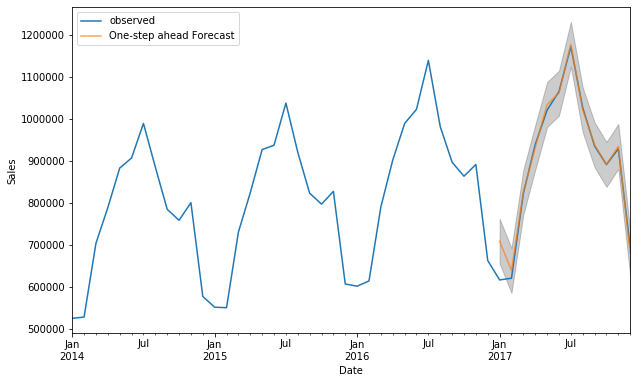

In [41]:
#绘制结果图
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()
##可以看到拟合的结果还不错
#预测未来几个月的销量

# 双十一的销量预测

## 多元线性回归方法

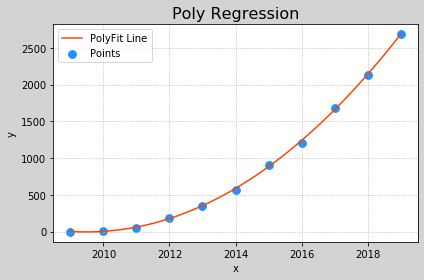

In [70]:
import sklearn.pipeline as pl
import sklearn.linear_model as lm
import sklearn.preprocessing as sp
import matplotlib.pyplot as mp
import numpy as np
import sklearn.metrics as sm
df=pd.read_csv('C:/Users/Administrator/Desktop/python/机器学习练习/双十一销量.csv')
x=df.iloc[:,0]
y=df.iloc[:,1]
x_train=np.array(x).reshape(-1,1)
# 创建模型
model = pl.make_pipeline(
    sp.PolynomialFeatures(5),  # 多项式特征拓展器
    lm.LinearRegression()  # 线性回归器
)
# 训练模型
model.fit(x_train, y)
#预测模型
pred_y=model.predict(x_train)
#评估模型
model.score(x_train,y)
# 绘制多项式回归线
px = np.linspace(x.min(), x.max(), 1000)
px = px.reshape(-1, 1)
pred_py = model.predict(px)
# 绘制图像
mp.figure("Poly Regression", facecolor='lightgray')
mp.title('Poly Regression', fontsize=16)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.xlabel('x')
mp.ylabel('y')

mp.scatter(x, y, s=60, marker='o', c='dodgerblue', label='Points')
mp.plot(px, pred_py, c='orangered', label='PolyFit Line')
mp.tight_layout()
mp.legend()
mp.show()

预测精准度达到99.96%